# **Preparing**

Check the GPU provided (if GPU is not opened: Edit -> Notebook Settings -> Hardware Accelerator select GPU)


In [ ]:
import locale
locale.getpreferredencoding = lambda: "UTF-8"
# https://github.com/googlecolab/colabtools/issues/3409

In [1]:
!nvidia-smi

Sun Dec 31 06:19:09 2023       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   51C    P8              10W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [2]:
!nvcc -V

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2023 NVIDIA Corporation
Built on Tue_Aug_15_22:02:13_PDT_2023
Cuda compilation tools, release 12.2, V12.2.140
Build cuda_12.2.r12.2/compiler.33191640_0


Clone the provided repo

In [3]:
%cd /content/
!rm -rf *
!git clone https://github.com/nhtlongcs/torch-realtime/ segmentation-jit

/content
Cloning into 'segmentation-jit'...
remote: Enumerating objects: 116, done.
remote: Counting objects: 100% (116/116), done.
remote: Compressing objects: 100% (80/80), done.
remote: Total 116 (delta 46), reused 88 (delta 27), pack-reused 0
Receiving objects: 100% (116/116), 219.38 KiB | 2.89 MiB/s, done.
Resolving deltas: 100% (46/46), done.


#**Train a mobile segmentation model (optional)**


In [14]:
!gdown -O ./map1_1.zip 1n5X3XbaugaBF5e7BZHUrj4xUZXvwfNZF
!gdown -O ./map1_2.zip 1FAPuIfAQNGbn0dAHzbVXvVXpCKCJCwTf
!gdown -O ./map1_3.zip 1o-Uhf4CrxMrxIyOumNWT94RHpfV9brF6
!gdown -O ./map1_4.zip 19-dAecFnVJV2-TL0WJl7QaGsgu30Q7qf
!gdown -O ./map2_1.zip 1ju-Ll71wb_gQANKBwMzQGlY3XqLpZMQO

Downloading...
From: https://drive.google.com/uc?id=1n5X3XbaugaBF5e7BZHUrj4xUZXvwfNZF
To: /content/map1_1.zip
100% 171M/171M [00:00<00:00, 205MB/s]
Downloading...
From: https://drive.google.com/uc?id=1FAPuIfAQNGbn0dAHzbVXvVXpCKCJCwTf
To: /content/map1_2.zip
100% 225M/225M [00:02<00:00, 87.5MB/s]
Downloading...
From: https://drive.google.com/uc?id=1o-Uhf4CrxMrxIyOumNWT94RHpfV9brF6
To: /content/map1_3.zip
100% 230M/230M [00:01<00:00, 124MB/s]
Downloading...
From: https://drive.google.com/uc?id=19-dAecFnVJV2-TL0WJl7QaGsgu30Q7qf
To: /content/map1_4.zip
100% 156M/156M [00:00<00:00, 161MB/s]
Downloading...
From: https://drive.google.com/uc?id=1ju-Ll71wb_gQANKBwMzQGlY3XqLpZMQO
To: /content/map2_1.zip
100% 362M/362M [00:05<00:00, 68.8MB/s]


In [15]:
!ls

map1_1.zip  map1_2.zip	map1_3.zip  map1_4.zip	map2_1.zip  segmentation-jit


In [16]:
!unzip -q ./map1_1.zip -d ./map1_1/
!unzip -q ./map1_2.zip -d ./map1_2/
!unzip -q ./map1_3.zip -d ./map1_3/
!unzip -q ./map1_4.zip -d ./map1_4/
!unzip -q ./map2_1.zip -d ./map2_1/

In [17]:
import os
img_root = '/content/segmentation-jit/data/gt_image/'
seg_root = '/content/segmentation-jit/data/gt_binary_image/'
os.makedirs(img_root, exist_ok=True)
os.makedirs(seg_root, exist_ok=True)

In [18]:
import os
import cv2
import numpy as np

X_train = []
Y_train = []

data_names = ['map1_1','map1_2','map1_3','map1_4','map2_1']
# data_names = ['map1_data']

globalframe = 0
totalframes = 0
os.chdir('/content/')
for data_name in data_names:

    imgs_dir = os.listdir('{}/screenshot'.format(data_name))
    imgs_dir.sort()
    totalframes += len(imgs_dir)
    for i in imgs_dir:
        globalframe += 1
        idx = i.split('.')[0]
        img = cv2.imread(os.path.join(data_name, 'screenshot', '{}.png'.format(idx)))
        seg = cv2.imread(os.path.join(data_name, 'road', '{}.png'.format(idx)), cv2.IMREAD_GRAYSCALE)

        cv2.imwrite(img_root + str(globalframe) + '.png',img)
        cv2.imwrite(seg_root + str(globalframe) + '.png',seg)
print(f'generated total {totalframes} frames')

generated total 11136 frames


In [19]:
%cd /content/segmentation-jit
!time python train.py

#**Download pretrained model**

In case you haven't trained your own model, we also offer a pre-trained model for you to continue following the instructions

In [20]:
%cd /content/segmentation-jit/
!gdown -O ./baseline.pth 1kEZsgih_iL-u4zPjCd7_1o6UGiOfLNW7

/content/segmentation-jit
Downloading...
From: https://drive.google.com/uc?id=1kEZsgih_iL-u4zPjCd7_1o6UGiOfLNW7
To: /content/segmentation-jit/baseline.pth
100% 19.1M/19.1M [00:00<00:00, 34.1MB/s]


#**Python**

In [21]:
%cd /content/segmentation-jit

/content/segmentation-jit


In [22]:
import time

from models import *

import torch
import torch.nn as nn
from torchvision import transforms as tf
import cv2

from google.colab.patches import cv2_imshow

In [23]:
SCALE_SIZE = 224

In [24]:
def process_image(im_path):
    im = cv2.imread(im_path)
    im = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)
    im = cv2.resize(im, (SCALE_SIZE, SCALE_SIZE), 0.0, 0.0, cv2.INTER_LINEAR)
    im = tf.Compose([
        tf.ToTensor(),
        tf.Normalize(mean=[0.485, 0.456, 0.406],
                        std=[0.229, 0.224, 0.225]),
    ])(im)
    return im

@torch.no_grad()
def test_fps(model, img, device='cuda', ntimes=500):
    # Warm up GPU(s)
    for i in range(ntimes):
        input = img.unsqueeze(0).to(device)
        output = model(input)

    start = time.time()
    for i in range(ntimes):
        input = img.unsqueeze(0).to(device)
        output = model(input)
    end = time.time()

    fps = ntimes / (end - start)
    return fps, output

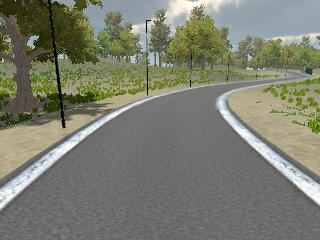

In [25]:
img = process_image('test.jpg')
cv2_imshow(cv2.imread('test.jpg', cv2.IMREAD_UNCHANGED))

In [ ]:
weights = torch.load('baseline.pth')
model = MobileUnet().to('cuda')
model.load_state_dict(weights)
model.eval()

FPS: 126.6273560596761


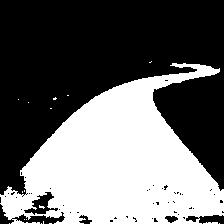

In [28]:
fps, output = test_fps(model, img)
print(f'FPS: {fps}')

output = torch.argmax(output, dim=1).float().cpu()
tf.ToPILImage(mode='L')(output).save('output.jpg')
cv2_imshow(cv2.imread('output.jpg', cv2.IMREAD_UNCHANGED))

In [29]:
model = model.to('cpu')
input = img.unsqueeze(0)

script_model = torch.jit.trace(model, input)

with torch.no_grad():
    output = script_model(input)
script_model.save('baseline_jit.pth')

FPS: 219.76141738669904


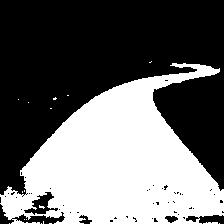

In [30]:
script_model = torch.jit.load('baseline_jit.pth')
script_model = script_model.to('cuda')
script_model.eval()

fps, output = test_fps(script_model, img)
print(f'FPS: {fps}')

output = torch.argmax(output, dim=1).float()
output = tf.ToPILImage(mode='L')(output)
output.save('output_jit_py.jpg')
cv2_imshow(cv2.imread('output_jit_py.jpg', cv2.IMREAD_UNCHANGED))

#**C++**

In [38]:
%cd /content/segmentation-jit
!rm -rf libtorch
!wget -q https://download.pytorch.org/libtorch/nightly/cu101/libtorch-cxx11-abi-shared-with-deps-latest.zip
!unzip -q libtorch-cxx11-abi-shared-with-deps-latest.zip

/content/segmentation-jit


In [39]:
%mkdir /content/segmentation-jit/jit/build
%cd /content/segmentation-jit/jit/build

/content/segmentation-jit/jit/build


In [40]:
%%shell
cd /content/segmentation-jit/jit/build
cmake -DCMAKE_PREFIX_PATH=/content/segmentation-jit/libtorch ..

CMake Deprecation Warning at CMakeLists.txt:1 (cmake_minimum_required):
  Compatibility with CMake < 3.5 will be removed from a future version of
  CMake.

  Update the VERSION argument <min> value or use a ...<max> suffix to tell
  CMake that the project does not need compatibility with older versions.


-- The C compiler identification is GNU 11.4.0
-- The CXX compiler identification is GNU 11.4.0
-- Detecting C compiler ABI info
-- Detecting C compiler ABI info - done
-- Check for working C compiler: /usr/bin/cc - skipped
-- Detecting C compile features
-- Detecting C compile features - done
-- Detecting CXX compiler ABI info
-- Detecting CXX compiler ABI info - done
-- Check for working CXX compiler: /usr/bin/c++ - skipped
-- Detecting CXX compile features
-- Detecting CXX compile features - done
-- Performing Test CMAKE_HAVE_LIBC_PTHREAD
-- Performing Test CMAKE_HAVE_LIBC_PTHREAD - Success
-- Found Threads: TRUE  
-- Found CUDA: /usr/local/cuda (found version "12.2") 
-- Caffe2: C

In [41]:
%cd /content/segmentation-jit/jit/

/content/segmentation-jit/jit


In [42]:
%%writefile unet_inference.cpp
#include <torch/torch.h>
#include <torch/script.h>
#include <opencv2/opencv.hpp>

#include <time.h>
#include <codecvt>
#include <locale>
#include <cstddef>
#include <cstdio>
#include <iostream>
#include <string>
#include <vector>
#include <chrono>

#define SCALE_SIZE 224

const at::Tensor MEAN = torch::tensor({0.485, 0.456, 0.406});
const at::Tensor STD = torch::tensor({0.229, 0.224, 0.225});

torch::Device device{torch::kCPU};

at::Tensor imageTransform(cv::Mat image)
{
    // Convert BGR to RGB
    cv::cvtColor(image, image, cv::COLOR_BGR2RGB);

    // Resize image
    cv::Mat resizedImage;
    cv::resize(image, resizedImage, cv::Size{SCALE_SIZE, SCALE_SIZE}, 0.0, 0.0, cv::INTER_LINEAR);

    // Convert to tensor
    at::Tensor image_tensor = torch::from_blob(resizedImage.data, {resizedImage.rows, resizedImage.cols, 3}, at::kByte);
    image_tensor = image_tensor / 255.0f;

    // Normalize
    image_tensor = (image_tensor - MEAN) / STD;

    // H, W, C -> 1, C, H, W
    image_tensor = image_tensor.permute({2, 0, 1}); // C,H,W

    return image_tensor;
}

// Convert Tensor to OpenCV Matrix
cv::Mat TensorToCVMat(torch::Tensor tensor)
{
    tensor = tensor.mul(255).clamp(0, 255).to(torch::kUInt8);
    tensor = tensor.permute({1, 2, 0});
    tensor = tensor.to(torch::kCPU);

    int height = tensor.size(0);
    int width = tensor.size(1);
    cv::Mat mat{cv::Size2i{width, height}, CV_8UC1};
    std::memcpy((void*)mat.data, tensor.data_ptr(), sizeof(torch::kU8) * tensor.numel());

    return mat.clone();
}

int main(int argc, char** argv)
{
    if (torch::cuda::is_available())
    {
        device = torch::Device{torch::kCUDA};
    }
    torch::jit::script::Module module;
    try {
        const std::string path{argv[1]};
        module = torch::jit::load(path);

        module.to(device);
        module.eval();
    } catch (const c10::Error& e) {
        std::cerr << "Error loading the model\n";
        std::cerr << e.msg();
        return -1;
    }

    // Test forward ok
    const std::string image_path{argv[2]};
    cv::Mat image = cv::imread(image_path, cv::IMREAD_ANYCOLOR);
    at::Tensor image_tensor = imageTransform(image);
    image_tensor = image_tensor.unsqueeze(0);

    std::vector<torch::jit::IValue> inputs;
    inputs.push_back(image_tensor.to(device));

    time_t start;
    time_t end;
    start = time(NULL);
    at::Tensor output = module.forward(inputs).toTensor();

    for (int i = 0; i < 500; i++)
        output = module.forward(inputs).toTensor();
    end = time(NULL);
    std::cerr << 500 / (end-start) << std::endl;

    output = output.argmax(1);
    cv::Mat output_mat = TensorToCVMat(output);
    // cv::resize(output_mat, output_mat, cv::Size{320, 240});
    cv::imwrite("./output_cpp.jpg", output_mat);

    return 0;
}

Overwriting unet_inference.cpp


In [43]:
%cd /content/segmentation-jit/jit/build
!make -j4
%cd /content/segmentation-jit/jit

/content/segmentation-jit/jit/build
[ 50%] Building CXX object CMakeFiles/run.dir/unet_inference.cpp.o
[100%] Linking CXX executable run
[100%] Built target run
/content/segmentation-jit/jit


In [44]:
%cd /content/segmentation-jit/jit/build/
!./run ../../baseline_jit.pth ../../test.jpg
%cd /content/segmentation-jit/jit

/content/segmentation-jit/jit/build
166
/content/segmentation-jit/jit


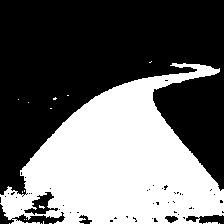

In [45]:
img = cv2.imread('/content/segmentation-jit/jit/build/output_cpp.jpg', cv2.IMREAD_UNCHANGED)
cv2_imshow(img)